<a href="https://colab.research.google.com/github/TanuRajput110/Spark-Foundation-Internship/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Sparks Foundation**

**Graduate Rotational Internship (GRIP)**

**January 2023 Batch**

Candidate Name : Tanu Rajput

##**Task 6 : Prediction Using Unsupervised ML**

**Objective of the task is to create the Decision Tree classifier and visualize it graphically**

**Unsupervised learning**----
 It is also known as unsupervised machine learning.

It uses machine learning algorithms to analyze and cluster unlabeled datasets.

 These algorithms discover hidden patterns or data groupings without the need for human intervention. 
 
 Its ability to discover similarities and differences in information make it the ideal solution for exploratory data analysis, cross-selling strategies, customer segmentation, and image recognition.
 
 Note---It is used to predict the categorical dependent variable(output)....

In [68]:
# Mount the google drive in google colab. 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# importing library called warning to ignore warnings.
import warnings
warnings.filterwarnings("ignore")

In [70]:
#Loading dataset
df = pd.read_csv('/content/drive/MyDrive/spark foundation/csv/task2.csv', index_col=[0])

In [71]:
# peeking at the first five rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
#shape of dataset
df.shape

(150, 6)

In [73]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [74]:
# checking duplicate values if any
df.duplicated().sum()

0

In [75]:
# checking the null values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [76]:
#the statistical description of the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


After digging deep into the description we came to know that there is no outliers in dataset.

In [77]:
# checking the correlation of the given data

df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


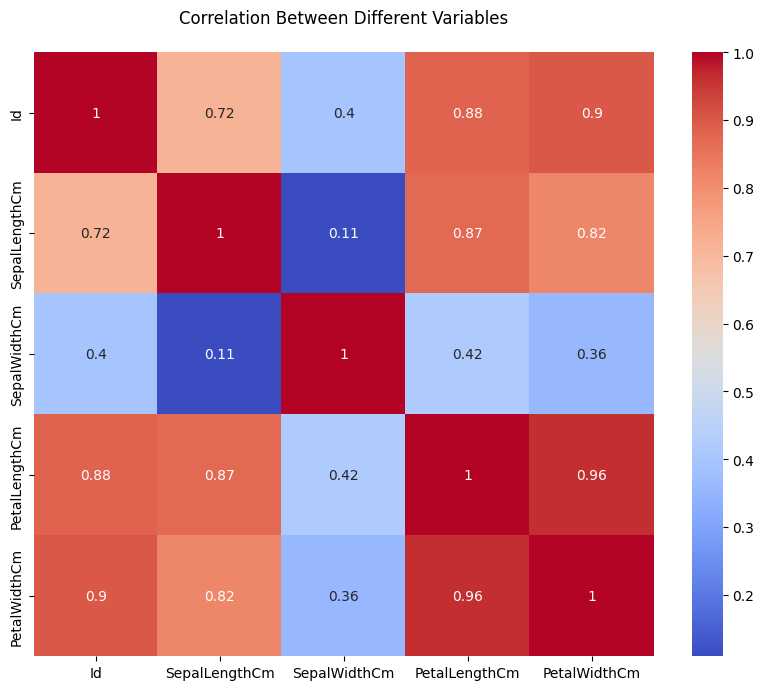

In [78]:
#Let's see the correlation visually
plt.figure(figsize=(10,8))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(abs(df.corr()),cmap='coolwarm', annot=True)     
plt.show()

**Note::**----we can see that PetalLength and PetalWidth are highly correlated wherease SepalLength and SepalWidth are not correlated.

##**EDA---------Let's Explore the data visually**

In [79]:
col=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

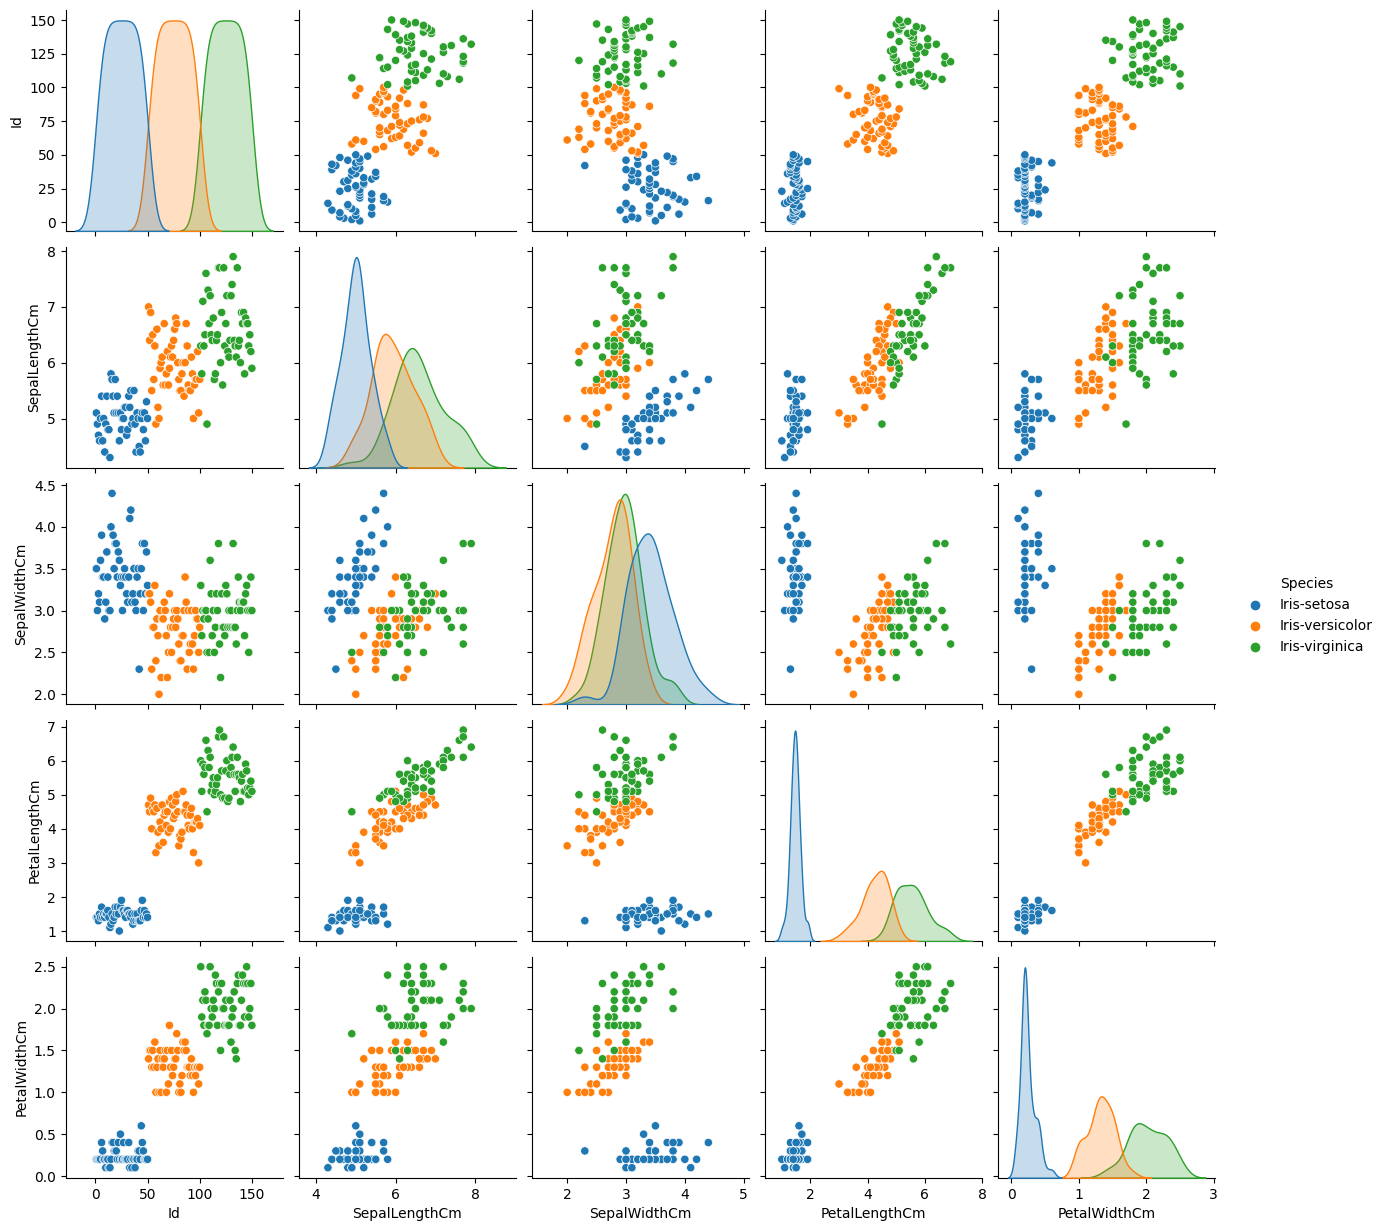

In [80]:
#checking relation among all with pairplot
sns.pairplot(df,hue='Species')

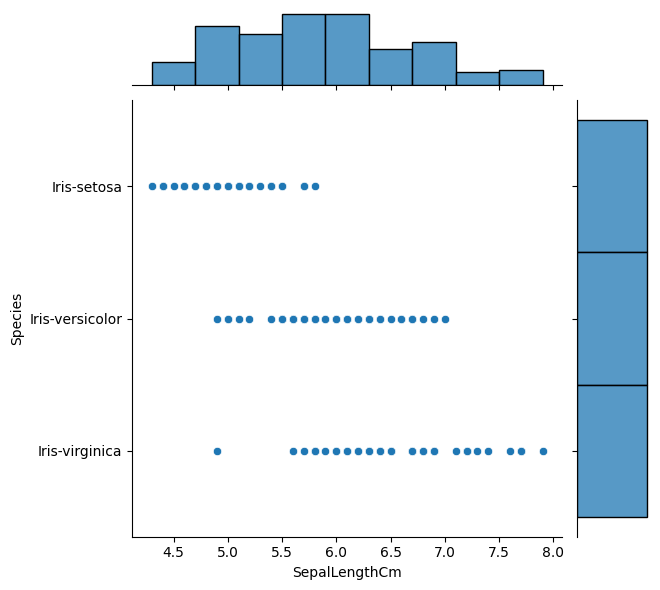

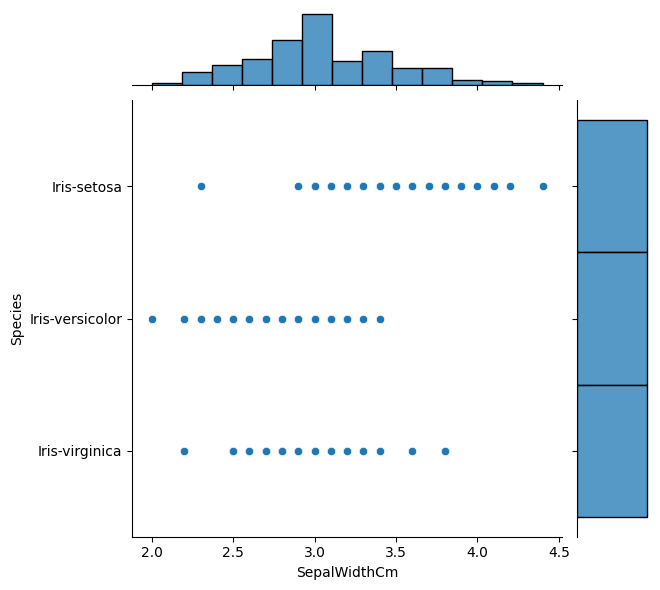

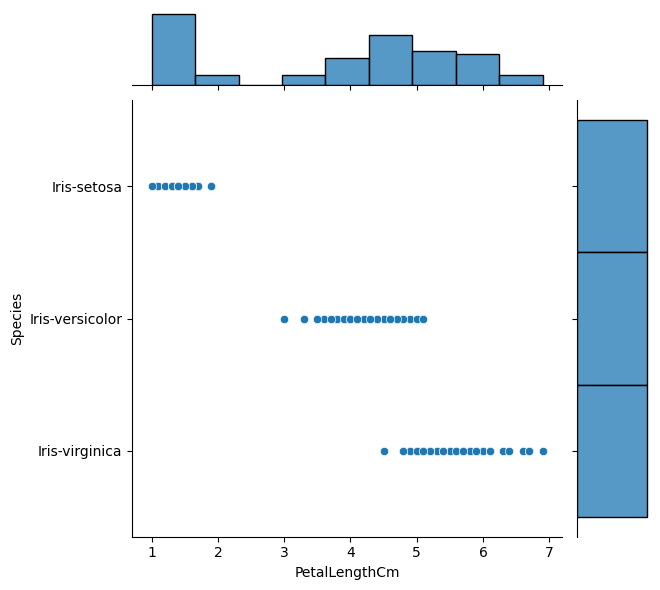

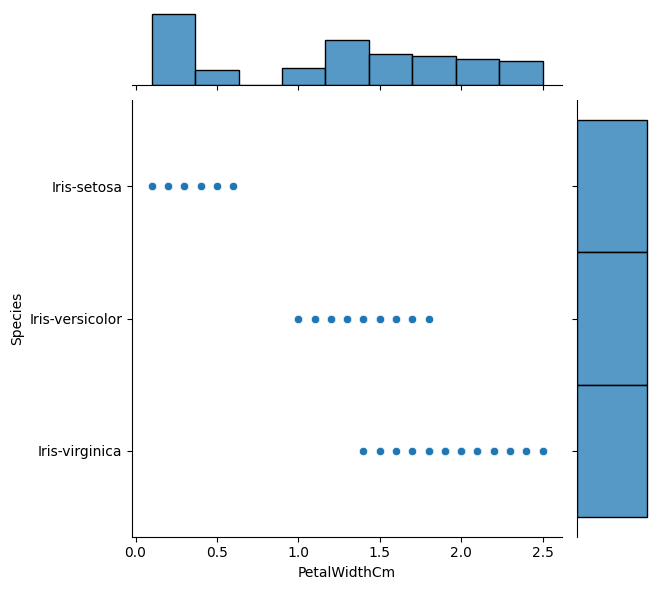

In [81]:
# checking the relation between all independent columns and the dependent column via  scatterplot with histogram
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
for i in col:
   sns.jointplot(x =df[i], y =df['Species'])
   

**Note:-----**We can see that we can easily segregate the data,but there are also the data in some  features which are being overlapped.Hence we have to use some clustering algorithms to segregate that data.

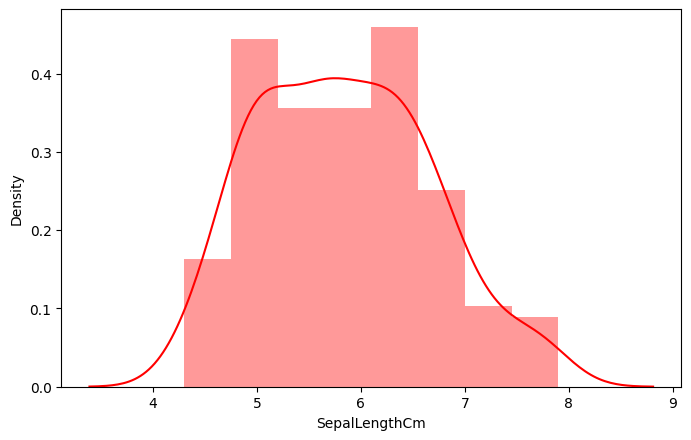

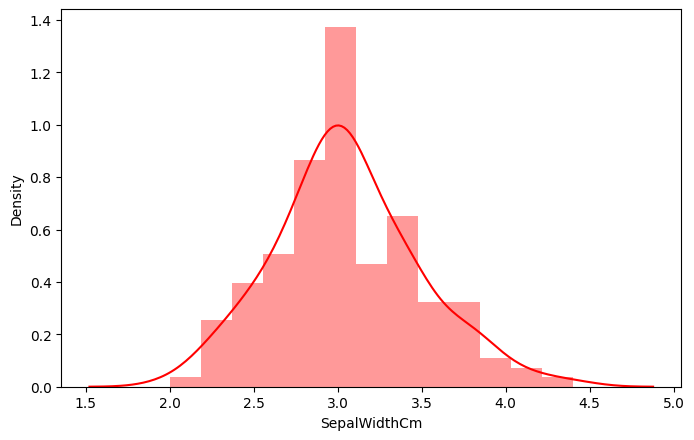

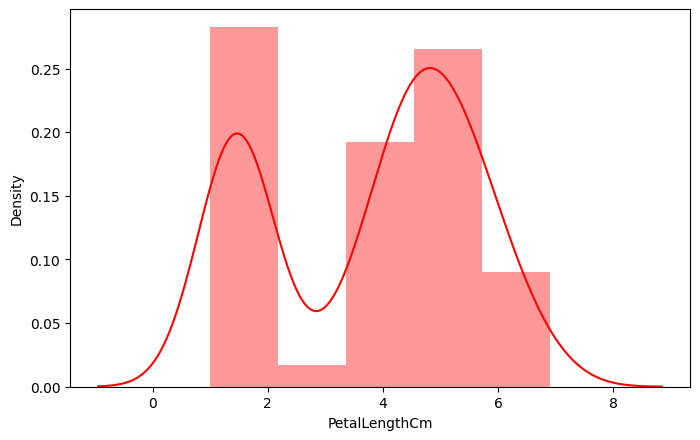

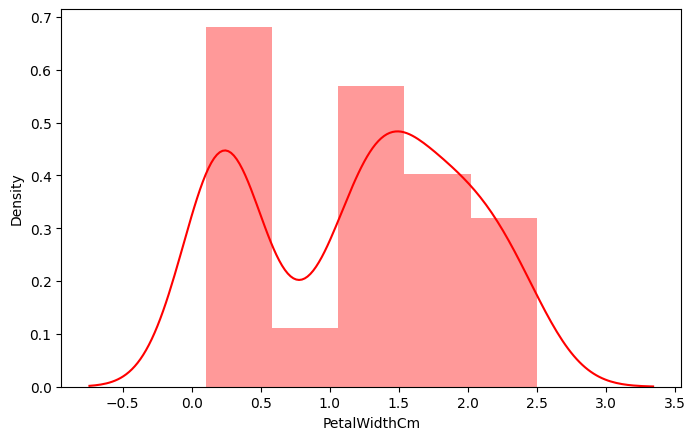

In [82]:
#Let's check the distribution of the Hours and Scores  columns

for i in col:
  plt.figure(figsize=(8,5))
  sns.distplot(df[i], color ='red')

**Note::**:---We see that almost we have normalised data,So no need to normalize it by transformation.

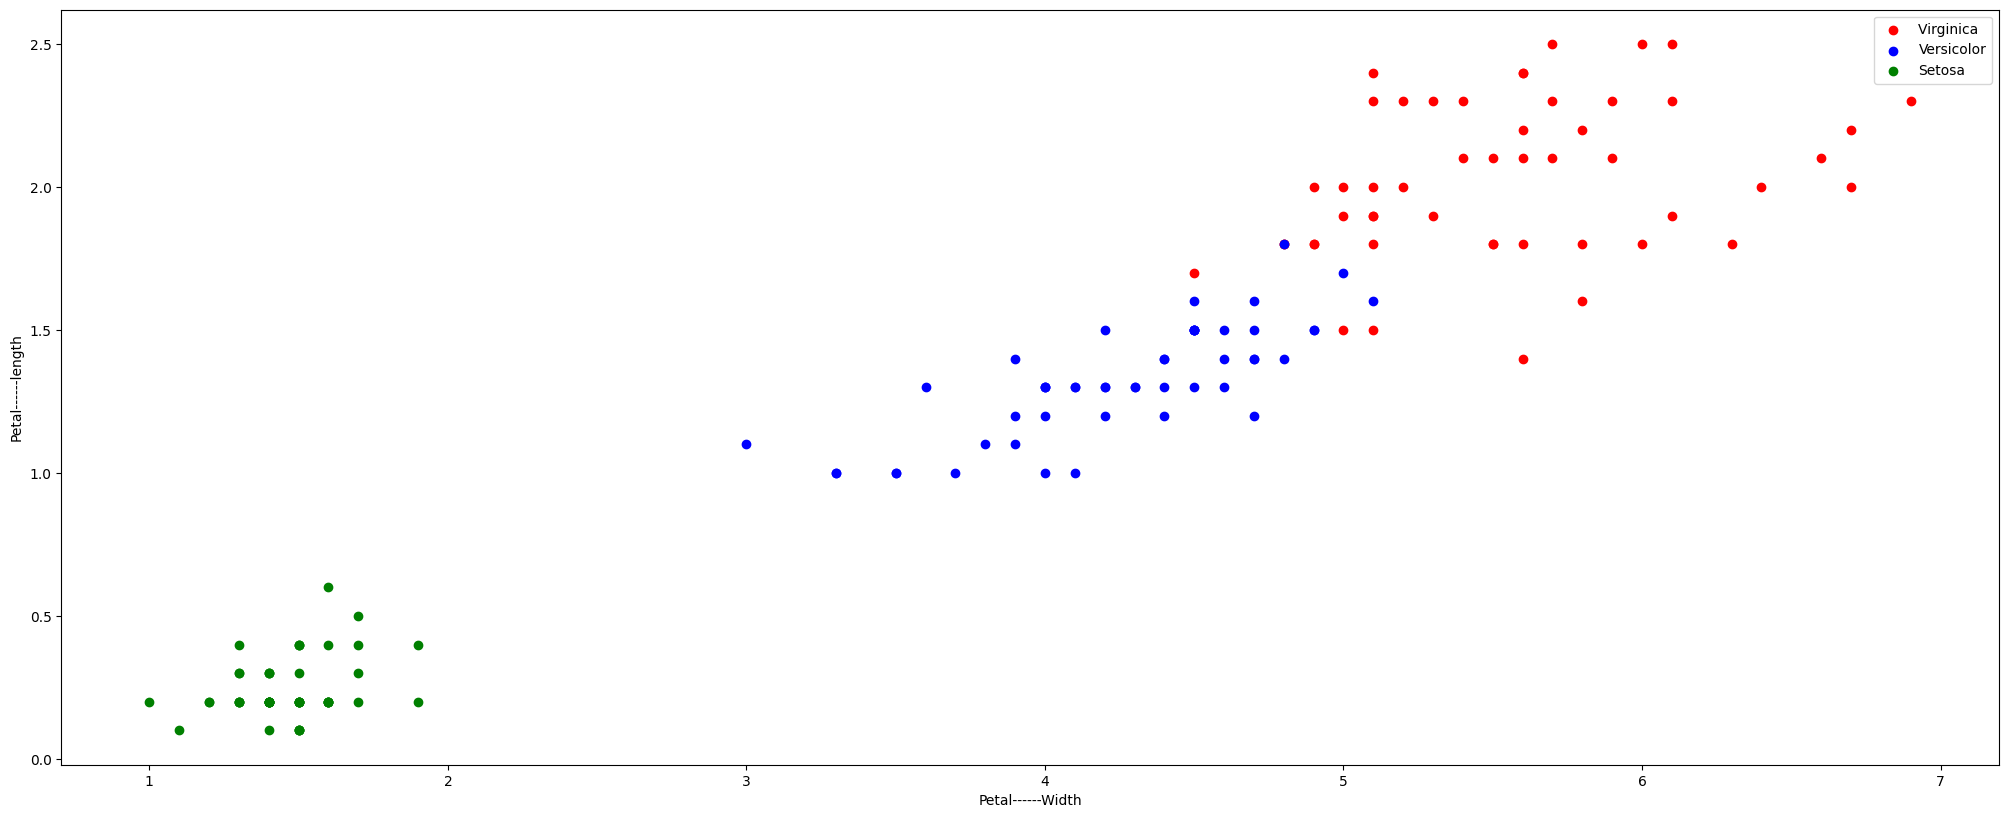

In [83]:
# visualzing the iris data

plt.figure(figsize=(25,10))
seto = df[df['Species']=='Iris-setosa']
vers = df[df['Species']=='Iris-versicolor']
virg = df[df['Species']=='Iris-virginica']

plt.scatter(virg['PetalLengthCm'],virg['PetalWidthCm'], color='red' , label='Virginica ')
plt.scatter(vers['PetalLengthCm'],vers['PetalWidthCm'], color='blue', label='Versicolor')
plt.scatter(seto['PetalLengthCm'],seto['PetalWidthCm'], color='green' , label='Setosa')
plt.xlabel('Petal------Width')
plt.ylabel('Petal------length')
plt.legend()
plt.show()

In [84]:
from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()
df["Target"]=encode.fit_transform(df["Species"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   Target         150 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 13.4+ KB


##**Data Modelling.**

In [85]:
X=df.drop(['Id','Species','Target'],axis=1)
y=df['Target']
print(f"SHAPE OF x---{X.shape}")
print(f"SHAPE OF y---{y.shape}")

SHAPE OF x---(150, 4)
SHAPE OF y---(150,)


In [86]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.35,random_state=2021)
print(df.shape)
print("X_train shape=",X_train.shape)
print("Y_train shape=",Y_train.shape)
print("X_test shape=",X_test.shape)
print("Y_test shape=",Y_test.shape)

(150, 7)
X_train shape= (97, 4)
Y_train shape= (97,)
X_test shape= (53, 4)
Y_test shape= (53,)


##**Building Model.**

###**1.DecisionTreeClassifier**

In [87]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='gini',max_depth=3)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

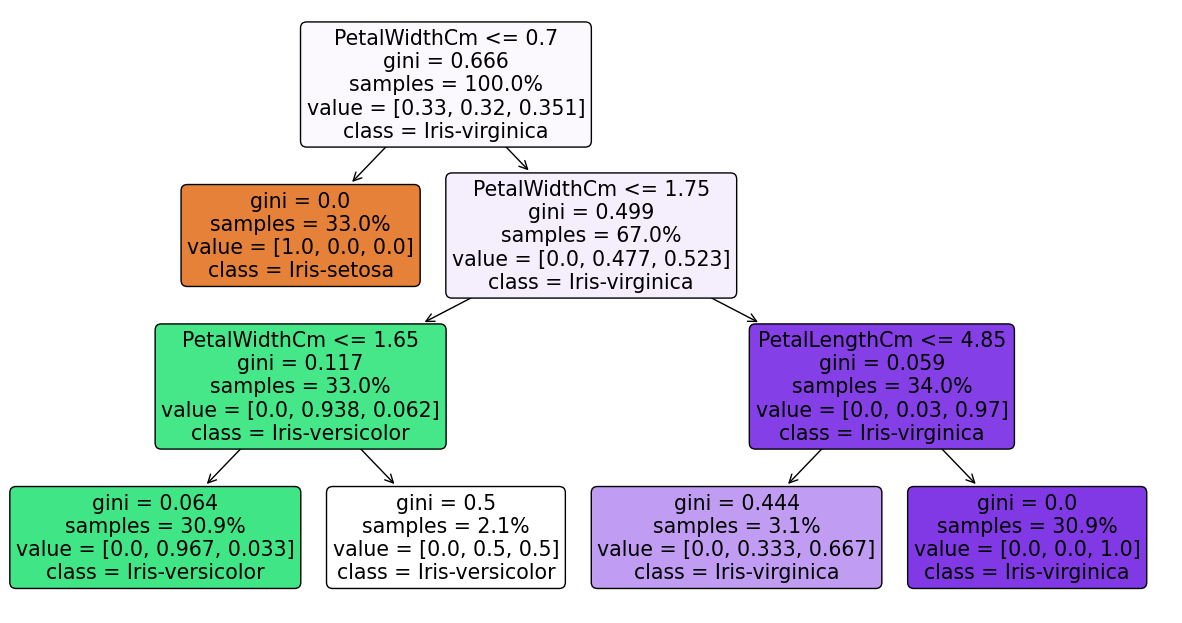

In [88]:
from sklearn import tree

FeatureNames=['SepalLengthCm', 'SepalWidthCm', 
                    'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize = (15,8))
tree.plot_tree(dtree, feature_names= FeatureNames , class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled = True, precision = 3,proportion =True, rounded = True)
plt.show()

In [89]:
y_pred=dtree.predict(X_test)
print(y_pred)
print('Iris-setosa=0 , Iris-versicolor=1, Iris-virginica=2')

[0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 2 1 1 0 1 1 2 1 0 1 1 1 1 0 0 1 1 0 2 1 1 2
 0 2 1 2 2 0 1 1 1 2 2 1 1 2 0 2]
Iris-setosa=0 , Iris-versicolor=1, Iris-virginica=2


In [90]:
print("TESTING ACCURACY OF DECISION TREE MODEL={}%".format(round(dtree.score(X_test,Y_test)*100,2)))

TESTING ACCURACY OF DECISION TREE MODEL=94.34%


In [91]:
from sklearn import metrics  
print('Mean Absolute Error:{}%'.format(round(metrics.mean_absolute_error(Y_test, y_pred)*100,3)))

Mean Absolute Error:5.66%
